In [ ]:
pip install jitcdde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55003 sha256=1130df65a5767ca87c8baab704fd8fd42cacab9f14fc6562a6fff4947ef53346
  Stored in directory: /root/.cache/pip/wheels/42/e3/4e/94b61188e5e3e62ba27e9586da5ecc7ea0f24e26916a250cc7
  Created wheel for chspy: filename=CHSPy-1.2.2-py3-none-any.whl size=11999 sha256=3a1cd33569520ddd38d641e0ba9d2b87506a30a0269a7ab1fb09e8e8cdbe44fc
  Stored in directory: /root/.cache/pip/wheels/11/17/24/0cca70842afd051f54325b813e637d8e8836d88c286ba63fae
  Created wheel for jitcxde_common: filename=jitcxde_common-1.5.4-py3-none-any.whl size=16755 sha256=6be78f10b4100348d04beb48cdd23321a368e7ff1a74ac0903342c0f87607cb9
  Stored in directory: /root/.cache

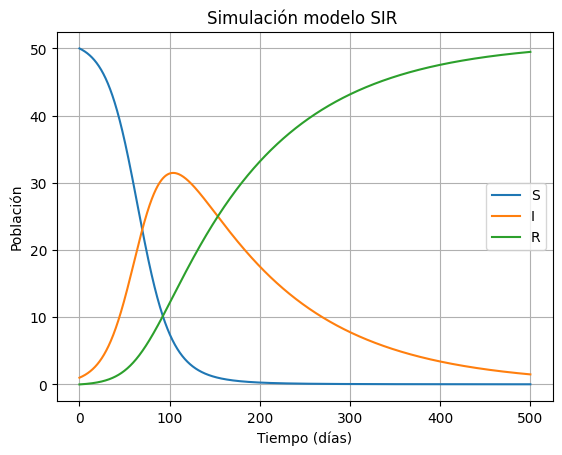

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SIR model equations
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


"""
Initial conditions (such as S0, I0, and R0) are not to be random but I hardcoded them with specific values. These choices are typically made based on the characteristics of the disease being modeled and the context of the simulation. Initial condition are set such that S0 = 99%, which indicates the proportion of susceptible individuals when the simulation starts. I0 is set to 1%, which indicates proportion of infected individuals to be 1% when the simulation starts. R0 is set to 0% which is expected that there are are no recovered individuals when the simulations start.
"""
S0 = 50.
I0 = 1.
R0 = 0.
y0 = [S0, I0, R0]

# Parameters
# β (beta) is transmission rate and I chose 30%. γ (gamma) is set to 1%
beta = 0.0013
gamma = 0.0083

# Time vector
t = np.linspace(0, 500, 2000)  # Simulate for 200 days

# Solve the SIR model equations using odeint()
solution = odeint(SIR_model, y0, t, args=(beta, gamma))

# Extract results
S, I, R = solution.T

# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(t, S, label='S')
plt.plot(t, I, label='I')
plt.plot(t, R, label='R')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Simulación modelo SIR ')
plt.legend()
plt.grid(True)
plt.savefig('SIR.png')

Generating, compiling, and loading C code.
Using default integration parameters.


/usr/local/lib/python3.10/dist-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/usr/local/lib/python3.10/dist-packages/jitcdde/_jitcdde.py:792: UserWarning: The target time is smaller than the current time. 

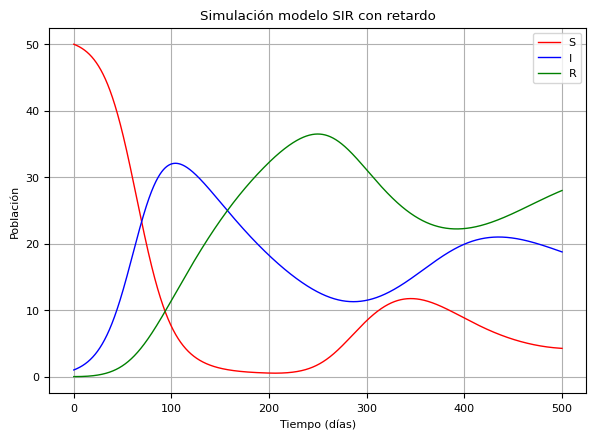

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

beta = 0.0013
omega = 0.0083

d=symengine.symbols("d")
equations=[
  omega*y(1,t-d) - beta*y(1, t)*y( 0 , t ),
	beta*y(1, t)*y(0, t)-omega*y(1,t),
	omega*y(1, t)-omega*y(1,t-d)]

ddesys = jitcdde(equations, control_pars=[d], max_delay=300.)

plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 1)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

ts = np.linspace(0, 500, 20000)

ddesys.constant_past([50., 1.,0.])
params=[200.]
ddesys.set_parameters(*params)
ys = []
for t in ts:
	ys.append(ddesys.integrate(t))
ys=np.array(ys)

axs.plot(ts, ys[:,0], color='red', linewidth=1,label='S')
axs.plot(ts, ys[:,1], color='blue', linewidth=1,label='I')
axs.plot(ts, ys[:,2], color='green', linewidth=1,label='R')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Simulación modelo SIR con retardo')
plt.legend()
plt.grid(True)
plt.savefig('SIRR.png')

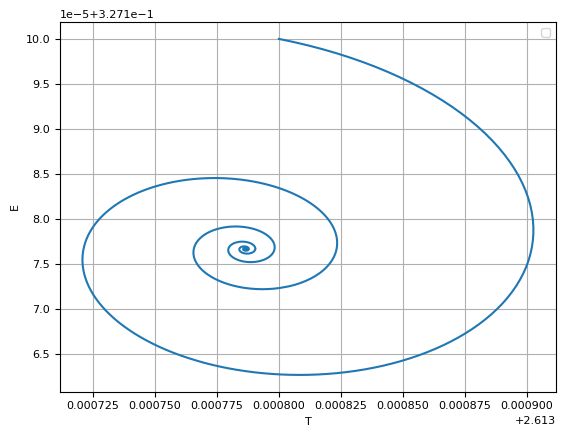

In [ ]:
def Tumor_model(y,t,r,K,n,omega,miu,nu):
    T,E = y
    dTdt = r*T*(1-(T/K))-n*E*T
    dEdt = omega+miu*T*E-nu*E
    return [dTdt, dEdt]

T0 = 0.3272
E0 = 2.6138
y0 = [T0, E0]

r=2.5
K=2.
n=0.8
omega=0.5
miu=4.
nu=1.5

# Time vector
t = np.linspace(0, 5000, 200000)  # Simulate for 200 days

# Solve the SIR model equations using odeint()
solution = odeint(Tumor_model, y0, t, args=(r,K,n,omega,miu,nu))

# Extract results
T,E = solution.T

# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(E, T)
plt.xlabel('T')
plt.ylabel('E')
plt.legend()
plt.grid(True)

Generating, compiling, and loading C code.


Using default integration parameters.
(50, 50)
(50, 50)


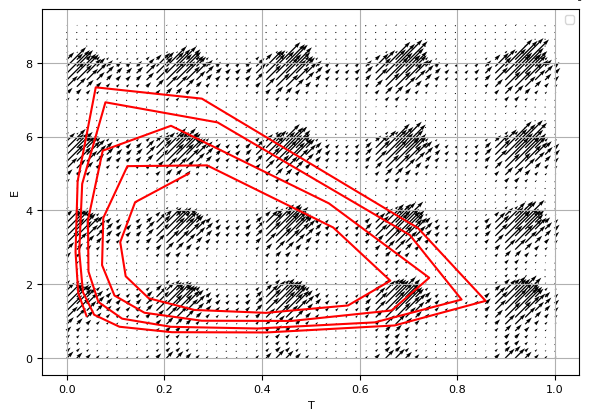

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r=2.5
K=2.
n=0.8
omega=0.5
miu=4.
nu=1.5

d=symengine.symbols("d")
equations=[
    r*y(0, t)*(1-(y(0, t)/K))-n*y(1, t)*y(0, t),
	  omega+miu*y(0, t - d)*y(1, t)-nu*y(1, t)
]
ddesys = jitcdde(equations, control_pars=[d], max_delay=0.3)

plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 1)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

ts = np.linspace(0, 20, 50)

ddesys.constant_past([0.25,5])
params=[0.3]
ddesys.set_parameters(*params)
ys = []
for t in ts:
	ys.append(ddesys.integrate(t))
ys=np.array(ys)
X, Y = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 9, 50))
print(X.shape)
V = np.outer(ys[:,0],ys[:,1])
U = np.outer(ys[:,0],ys[:,1])
print(V.shape)
axs.plot( ys[:,0], ys[:,1], color='red')
Q = axs.quiver(X, Y, U, V, units='width')
qk = axs.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.xlabel('T')
plt.ylabel('E')
plt.legend()

plt.grid(True)

Generating, compiling, and loading C code.


Using default integration parameters.


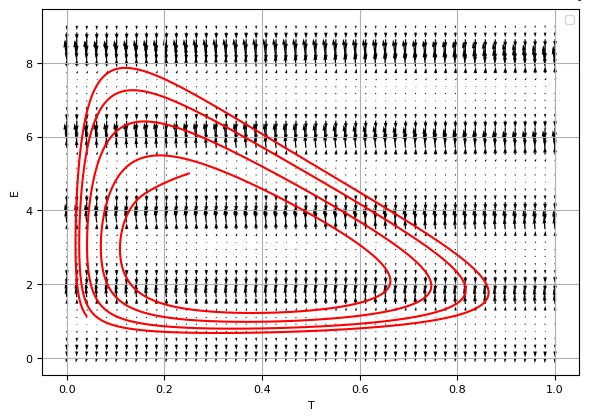

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

r = 2.5
K = 2.
n = 0.8
omega = 0.5
miu = 4.
nu = 1.5

d = symengine.symbols("d")
equations = [
    r * y(0, t) * (1 - (y(0, t) / K)) - n * y(1, t) * y(0, t),
    omega + miu * y(0, t - d) * y(1, t) - nu * y(1, t)
]
ddesys = jitcdde(equations, control_pars=[d], max_delay=0.3)

plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 1)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

ts = np.linspace(0, 20, 2500)

ddesys.constant_past([0.25, 5])
params = [0.3]
ddesys.set_parameters(*params)
ys = []
for t in ts:
    ys.append(ddesys.integrate(t))
ys = np.array(ys)

# Calcula las derivadas de las variables de estado con respecto al tiempo (campo vectorial)
U = np.gradient(ys[:, 0], axis=0)
V = np.gradient(ys[:, 1], axis=0)

X, Y = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 9, 50))

axs.plot(ys[:, 0], ys[:, 1], color='red')
Q = axs.quiver(X, Y, U, V, units='width')
qk = axs.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E', coordinates='figure')

plt.xlabel('T')
plt.ylabel('E')
plt.legend()

plt.grid(True)
plt.show()


Generating, compiling, and loading C code.
Using default integration parameters.


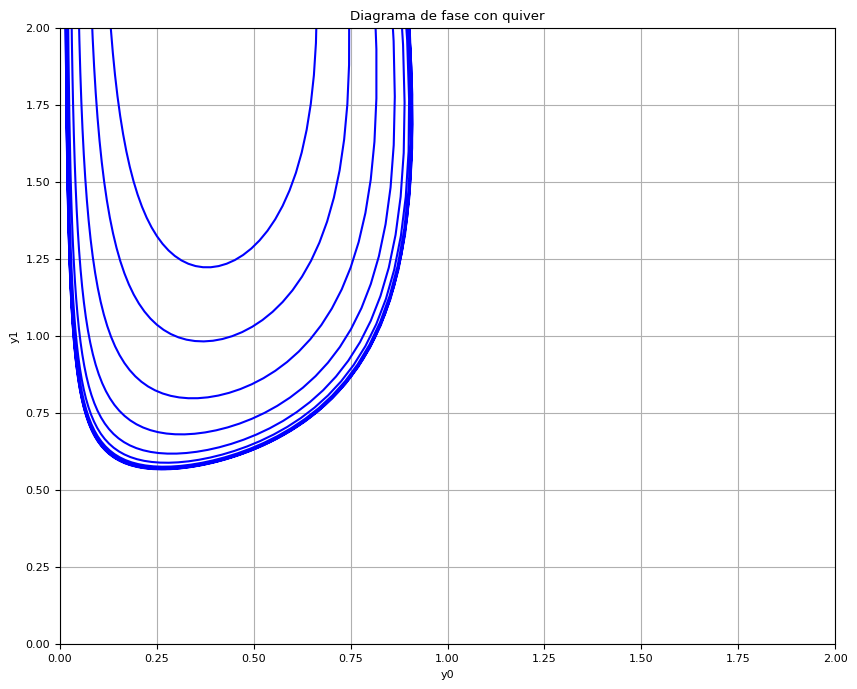

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

# Parámetros del sistema
r = 2.5
K = 2.0
n = 0.8
omega = 0.5
miu = 4.0
nu = 1.5

# Definir el retardo como un símbolo
d = symengine.symbols("d")

# Definir las ecuaciones diferenciales con delay
equations = [
    r * y(0, t) * (1 - (y(0, t) / K)) - n * y(1, t) * y(0, t),
    omega + miu * y(0, t - d) * y(1, t) - nu * y(1, t)
]

# Crear el sistema de ecuaciones diferenciales con delay
ddesys = jitcdde(equations, control_pars=[d], max_delay=0.3)

# Definir los parámetros iniciales
ddesys.constant_past([0.25, 5])
params = [0.3]
ddesys.set_parameters(*params)

# Integrar el sistema para obtener los puntos de la trayectoria
ts = np.linspace(0, 50, 1000)
ys = []
for t in ts:
    ys.append(ddesys.integrate(t))
ys = np.array(ys)

# Crear el campo vectorial para el diagrama de fase
X, Y = np.meshgrid(np.linspace(0, 50, 20), np.linspace(0, 50, 20))
U = r * X * (1 - (X / K)) - n * Y * X
V = omega + miu * X * Y - nu * Y

# Graficar el campo vectorial y la trayectoria
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, color='gray', alpha=0.5)
plt.plot(ys[:, 0], ys[:, 1], 'b')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('Diagrama de fase con quiver')
plt.grid()
plt.show()

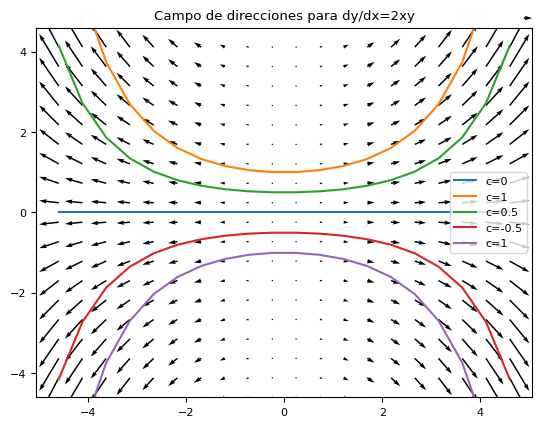

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-4.6, 4.6, 20)
c0=0
c1 = 1
c2 = 0.5
c3 = -0.5
c4 = -1
X, Y = np.meshgrid(np.linspace(-4.6, 4.6, 20),np.linspace(-4.6, 4.6, 20))
V = (0.2*(X**2)*Y)/2
U = X

fig1, ax1 = plt.subplots()
ax1.set_title('Campo de direcciones para dy/dx=2xy')
ax1.plot(x,c0*np.exp(0.1*x**2),label='c=0')
ax1.plot(x,c1*np.exp(0.1*x**2),label='c=1')
ax1.plot(x,c2*np.exp(0.1*x**2),label='c=0.5')
ax1.plot(x,c3*np.exp(0.1*x**2),label='c=-0.5')
ax1.plot(x,c4*np.exp(0.1*x**2),label='c=1')
Q = ax1.quiver(X,Y, U,V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.ylim([-4.6,4.6])
plt.legend()
plt.savefig('VF.png')

In [ ]:
%matplotlib notebook

In [ ]:
pip install neurodiffeq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.4 MB/s eta 0:00:00
  Created wheel for neurodiffeq: filename=neurodiffeq-0.6.3-py3-none-any.whl size=132420 sha256=7ec284fe870a51e66b6b6b2cc2c6a4aff73351d452c0f83a3f660a920e734425
  Stored in directory: /root/.cache/pip/wheels/f6/e7/71/84c06f693bbf2ffd52a7c5ecd416c2a2ac053569b283171ddf
Successfully built neurodiffeq


In [ ]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv
from neurodiffeq.monitors import Monitor1D
import torch.nn as nn
from neurodiffeq.networks import Swish
import numpy as np

In [ ]:
def ode_system(u, v, t):
    return [diff(u,t)-(u-u*v), diff(v,t)-(u*v-v)]

conditions = [IVP(t_0=0.0, u_0=1.5), IVP(t_0=0.0, u_0=1.0)]
nets = [FCNN(actv=SinActv), FCNN(actv=SinActv)]
solver = Solver1D(ode_system, conditions, t_min=0.1, t_max=12.0, nets=nets)
solver.fit(max_epochs=3000)
solution = solver.get_solution()

Training Progress:   0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
t=np.linspace(0.,12.,2000)
u, v = solution(t, to_numpy=True)  # t can be np.ndarray or torch.Tensor

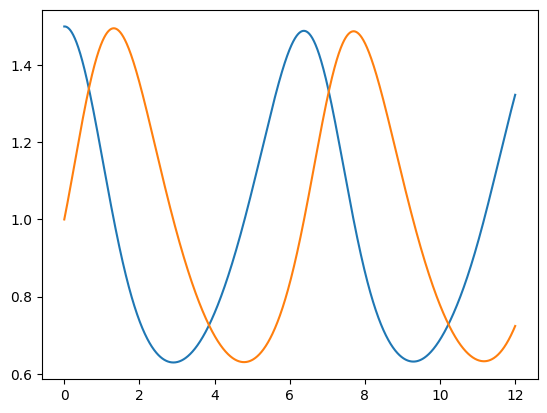

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t,u)
plt.plot(t,v)
plt.show()

In [ ]:
print(u)
print(v)

[1.5        1.50006472 1.50009363 ... 1.31451849 1.31673572 1.31894734]
[1.         1.00300018 1.00601284 ... 0.71795701 0.71932941 0.72071303]


Training Progress:   0%|          | 0/3000 [00:00<?, ?it/s]

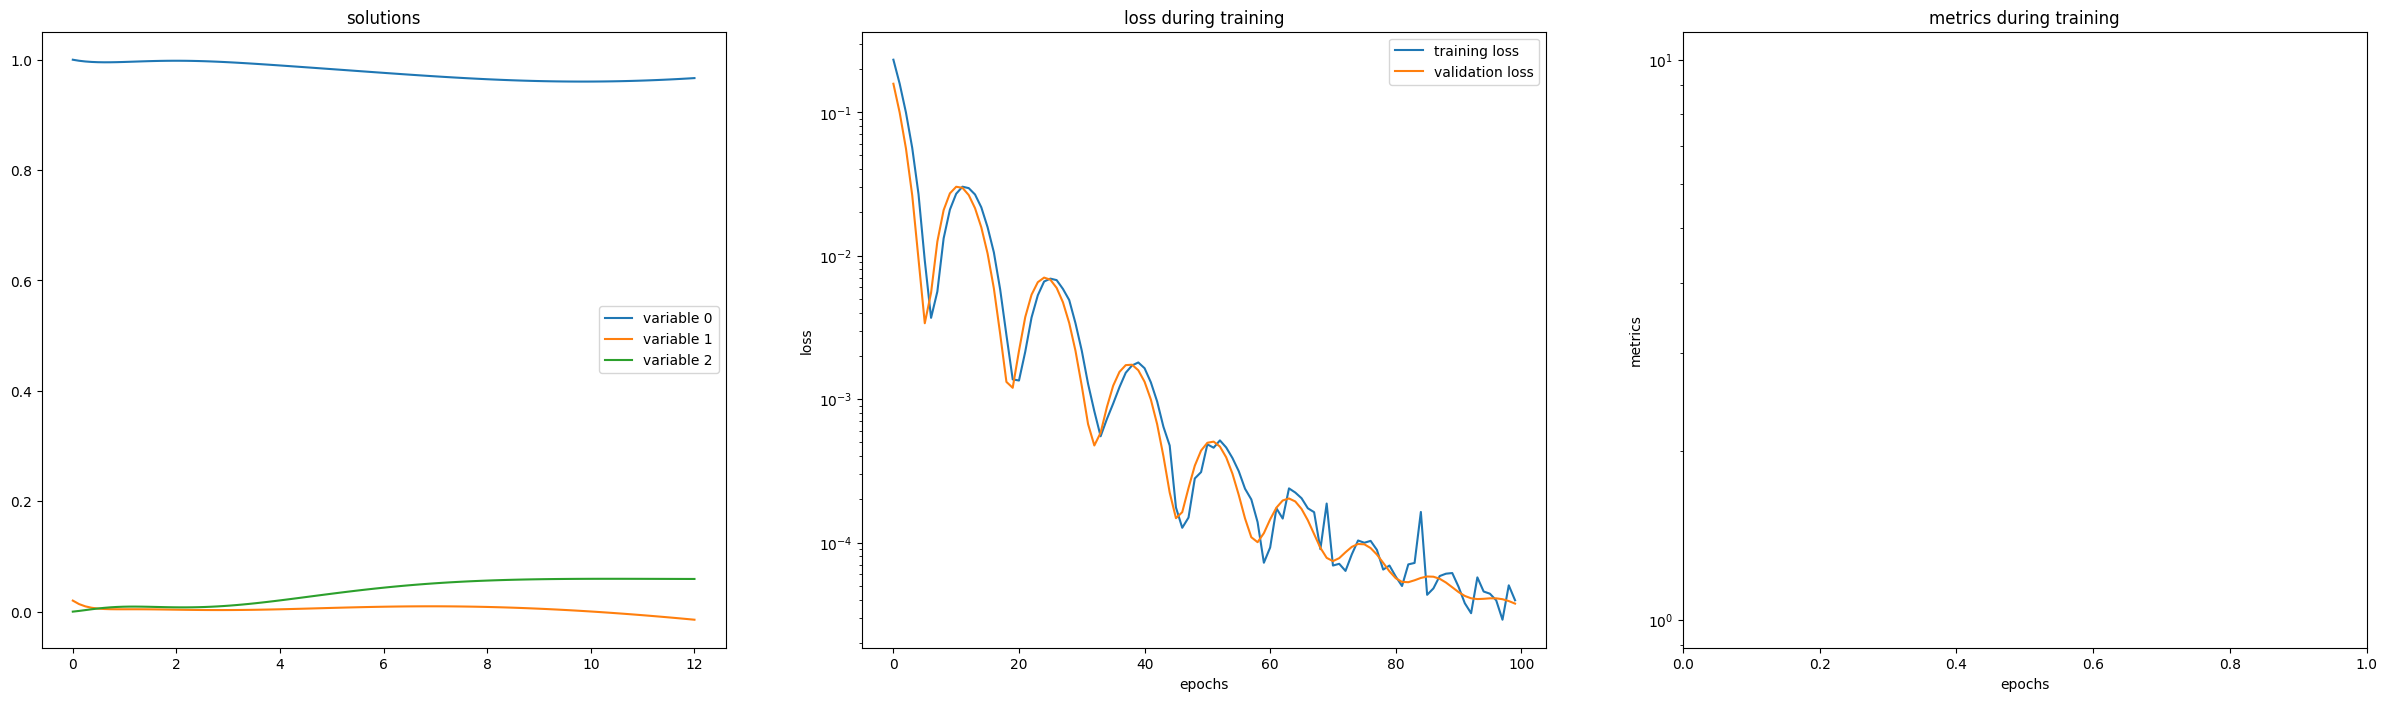

In [ ]:
def SIR_system(s, i, r, t):
    beta = 0.5
    gamma = 0.83
    return [diff(s,t)+(beta * s * i), diff(i,t)-(beta * s * i - gamma * i), diff(r,t)-(gamma * i)]

conditions = [IVP(t_0=0.0, u_0=1.), IVP(t_0=0.0, u_0=1./50.), IVP(t_0=0.0, u_0=0.0)]
nets = [FCNN(actv=Swish), FCNN(actv=Swish), FCNN(actv=Swish)]
solver = Solver1D(SIR_system, conditions, t_min=0.1, t_max=12.0, nets=nets)
monitor = Monitor1D(t_min=0.0, t_max=12.0, check_every=100)
solver.fit(max_epochs=3000, callbacks=[monitor.to_callback()])
solution = solver.get_solution()

In [ ]:
t=np.linspace(0.,12., 2000)
s, i, r = solution(t, to_numpy=True)  # t can be np.ndarray or torch.Tensor

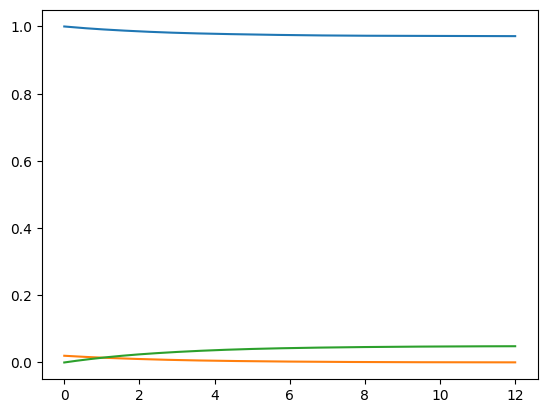

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t,s)
plt.plot(t,i)
plt.plot(t,r)
plt.show()

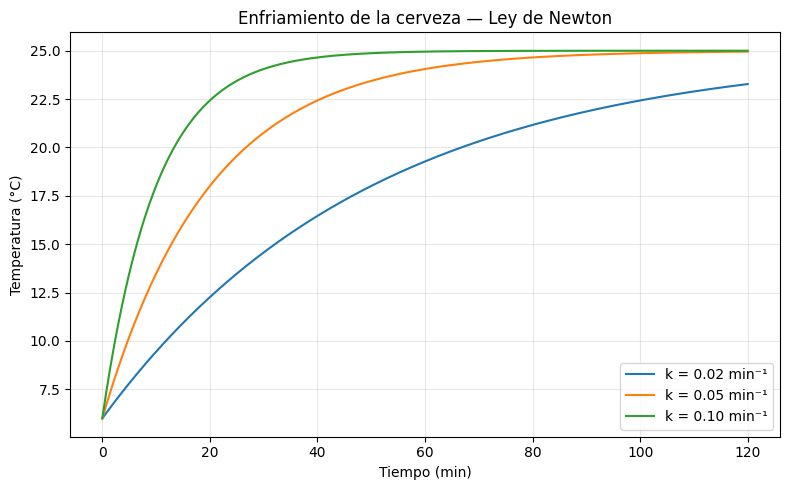

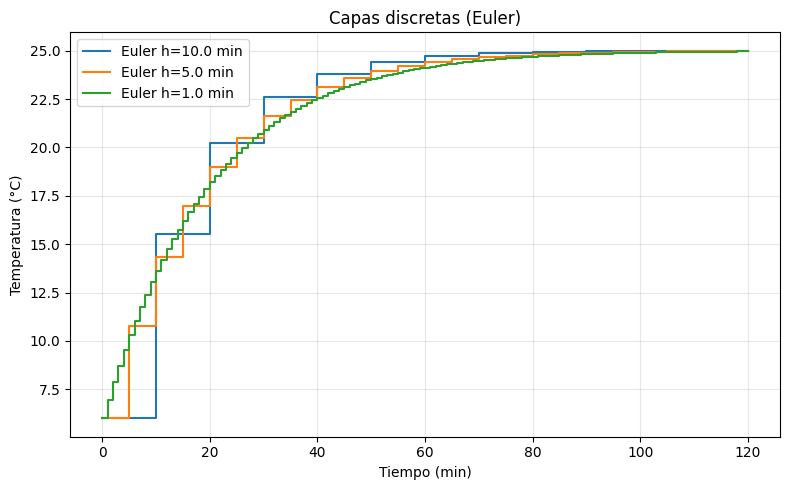

    t (min)  T (°C)
0         0    6.00
1        10   13.48
2        20   18.01
3        30   20.76
4        40   22.43
5        50   23.44
6        60   24.05
7        70   24.43
8        80   24.65
9        90   24.79
10      100   24.87
11      110   24.92
12      120   24.95


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parámetros del modelo ---
T0 = 6.0    # Temperatura inicial de la cerveza (°C)
Ta = 25.0   # Temperatura ambiente (°C)
ks = [0.02, 0.05, 0.10]  # Constantes de enfriamiento (min^-1)
t_max = 120.0  # Tiempo máximo en minutos
t = np.linspace(0, t_max, 601)

# --- Solución exacta: Ley de enfriamiento de Newton ---
def exact_solution(k, t):
    return Ta + (T0 - Ta) * np.exp(-k * t)

# --- Gráfica 1: Variación de k ---
plt.figure(figsize=(8,5))
for k in ks:
    plt.plot(t, exact_solution(k, t), label=f"k = {k:.2f} min⁻¹")
plt.xlabel("Tiempo (min)")
plt.ylabel("Temperatura (°C)")
plt.title("Enfriamiento de la cerveza — Ley de Newton")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Método de Euler explícito ---
def euler_explicit(k, T0, Ta, h, t_max):
    n_steps = int(np.ceil(t_max / h))
    times = np.linspace(0, n_steps*h, n_steps+1)
    T = np.zeros_like(times)
    T[0] = T0
    for i in range(n_steps):
        T[i+1] = T[i] + h * (-k * (T[i] - Ta))
    return times, T

# --- Gráfica 2: Solución continua vs discretas ---
k = 0.05
T_exact = exact_solution(k, t)
hs = [10.0, 5.0, 1.0]

plt.figure(figsize=(8,5))
#plt.plot(t, T_exact, label="Solución exacta (continuo)", linewidth=2)
for h in hs:
    times, T_e = euler_explicit(k, T0, Ta, h, t_max)
    plt.step(times, T_e, where='post', label=f"Euler h={h} min")
plt.xlabel("Tiempo (min)")
plt.ylabel("Temperatura (°C)")
plt.title("Capas discretas (Euler)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Tabla de datos ---
sample_times = np.arange(0, 121, 10)
sample_temps = exact_solution(0.05, sample_times)
df = pd.DataFrame({"t (min)": sample_times, "T (°C)": np.round(sample_temps, 2)})
print(df)


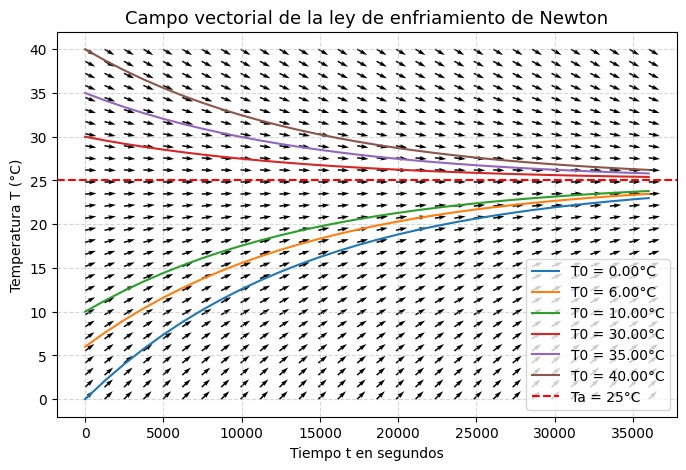

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T0 = [0.0, 6.0, 10.0, 30.0, 35.0, 40.0]
k = 7e-5          # constante de enfriamiento
Ta = 25         # temperatura ambiente (°C)
t_min, t_max = 0, 10*3600
T_min, T_max = 0, 40

# Malla de puntos (t, T)
t = np.linspace(t_min, t_max, 30)
T = np.linspace(T_min, T_max, 30)
T_grid, t_grid = np.meshgrid(T, t)

def exact_solution(Ta, T0, k, t):
    return Ta + (T0 - Ta) * np.exp(-k * t)

# Campo vectorial: dT/dt = -k (T - T_a)
dTdt = -k * (T_grid - Ta)
dt = np.ones_like(dTdt)

# Normalización para que las flechas se vean bien
magnitude = np.sqrt(dt**2 + dTdt**2)
dt /= magnitude
dTdt /= magnitude

# Gráfica del campo vectorial
plt.figure(figsize=(8, 5))
for T in T0:
    plt.plot(t, exact_solution(Ta, T, k, t), label=f"T0 = {T:.2f}°C")
plt.quiver(t_grid, T_grid, dt, dTdt, angles="xy")
plt.title("Campo vectorial de la ley de enfriamiento de Newton", fontsize=13)
plt.xlabel("Tiempo t en segundos")
plt.ylabel("Temperatura T (°C)")

# Temperatura ambiente
plt.axhline(Ta, color='r', linestyle='--', label=f"Ta = {Ta}°C")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("grafico_Campo_direccional.png", dpi=300)
plt.show()



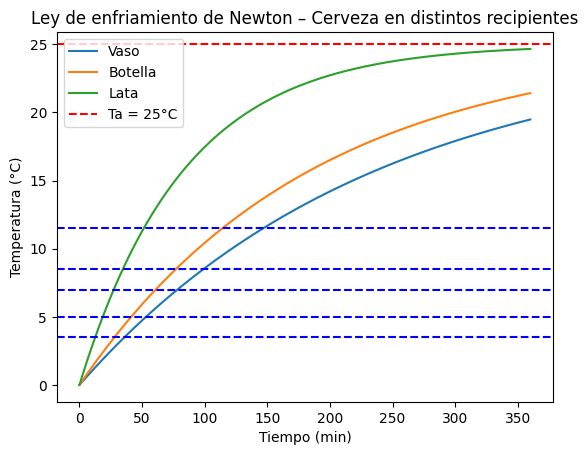

In [25]:
import numpy as np
import matplotlib.pyplot as plt

T_amb = 25
T0 = 0
t = np.linspace(0, 6*3600, 200)  # 4 horas en segundos
Ti = [3.5, 5.0, 7, 8.5, 11.5, ]

k_values = {
    "Vaso": 7e-5,
    "Botella": 9e-5,
    "Lata": 2e-4
}

for label, k in k_values.items():
    T = T_amb + (T0 - T_amb) * np.exp(-k * t)
    plt.plot(t/60, T, label=label)
for Ti_value in Ti:
    plt.axhline(Ti_value, color='b', linestyle='--')
plt.xlabel("Tiempo (min)")
plt.ylabel("Temperatura (°C)")
plt.axhline(Ta, color='r', linestyle='--', label=f"Ta = {Ta}°C")
plt.title("Ley de enfriamiento de Newton – Cerveza en distintos recipientes")
plt.legend()
plt.savefig("grafico_solucion.png", dpi=300)
plt.show()


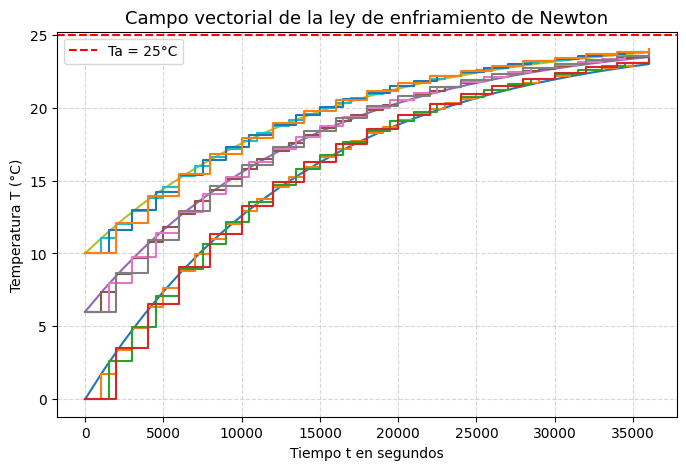

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T0 = [0.0, 6.0, 10.0]
hs = [1000.0, 1500.0, 2000.0]
k = 7e-5          # constante de enfriamiento
Ta = 25         # temperatura ambiente (°C)
t_min, t_max = 0, 10*3600
T_min, T_max = 0, 30

def exact_solution(Ta, T0, k, t):
    return Ta + (T0 - Ta) * np.exp(-k * t)


# Gráfica del campo vectorial

plt.figure(figsize=(8,5))

for T in T0:
    plt.plot(t, exact_solution(Ta, T, k, t))
    for h in hs:
      times, T_e = euler_explicit(k, T, Ta, h, t_max)
      plt.step(times, T_e, where='post')
plt.title("Campo vectorial de la ley de enfriamiento de Newton", fontsize=13)
plt.xlabel("Tiempo t en segundos")
plt.ylabel("Temperatura T (°C)")

# Temperatura ambiente
plt.axhline(Ta, color='r', linestyle='--', label=f"Ta = {Ta}°C")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("grafico_euler.png", dpi=300)
plt.show()

     cerveza  tiempo_min  temperatura
0  Cerveza_1           0     7.399966
1  Cerveza_1           5     8.302354
2  Cerveza_1          10     8.637946
3  Cerveza_1          15     9.286920
4  Cerveza_1          20    10.262611


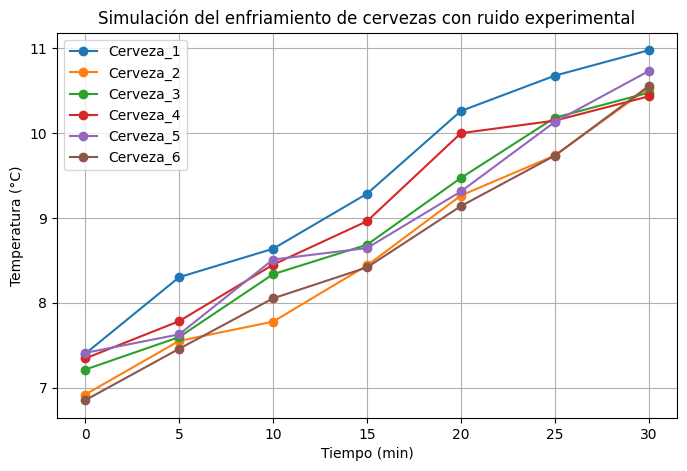

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros físicos
T_amb = 20.4          # Temperatura ambiente (°C)
T0 = 7.0            # Temperatura inicial de la cerveza (°C)
k = 2e-4             # Constante de enfriamiento (1/s)

# Tiempo: 0 a 30 minutos en pasos de 5 min
t_min = np.arange(0, 31, 5)     # minutos
t = t_min * 60                  # convertir a segundos para la ecuación

# Ecuación diferencial de enfriamiento: T(t) = T_amb + (T0 - T_amb)e^{-k t}
def newton_cooling(t, T0, k, T_amb):
    return T_amb + (T0 - T_amb) * np.exp(-k * t)

# Simular 6 cervezas con ligeras variaciones
np.random.seed(42)
data = []

for i in range(1, 7):
    # Pequeña variación en k y temperatura inicial
    k_i = k * np.random.uniform(0.8, 1.2)
    T0_i = T0 + np.random.uniform(-0.3, 0.3)
    T_teorica = newton_cooling(t, T0_i, k_i, T_amb)

    # Añadir ruido experimental (±0.2°C)
    ruido = np.random.normal(0, 0.2, size=len(t))
    T_obs = T_teorica + ruido

    df_i = pd.DataFrame({
        'cerveza': f'Cerveza_{i}',
        'tiempo_min': t_min,
        'temperatura': T_obs
    })
    data.append(df_i)

# Unir todos los datos
df = pd.concat(data, ignore_index=True)

# Mostrar una muestra de la base de datos
print(df.head())

# Graficar
plt.figure(figsize=(8,5))
for i in df['cerveza'].unique():
    sub = df[df['cerveza'] == i]
    plt.plot(sub['tiempo_min'], sub['temperatura'], 'o-', label=i)

plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Simulación del enfriamiento de cervezas con ruido experimental')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
!pip install diffrax equinox optax

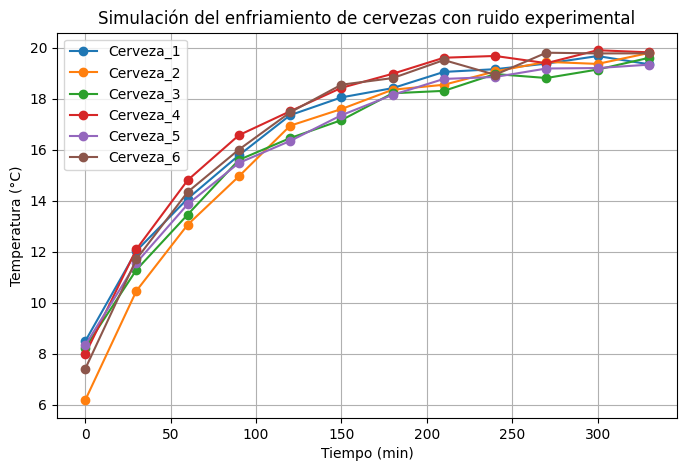

Step 0, Loss = 446041.875000
Step 200, Loss = 12.419432
Step 400, Loss = 0.211677
Step 600, Loss = 0.209652
Step 800, Loss = 0.207385
Step 1000, Loss = 0.204908
Step 1200, Loss = 0.202320
Step 1400, Loss = 0.199714
Step 1600, Loss = 0.197160
Step 1800, Loss = 0.194717


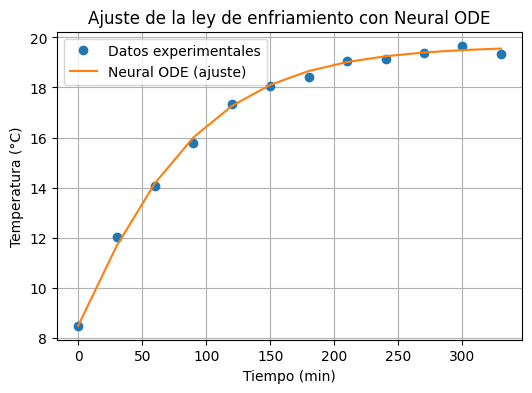

In [70]:
import time
import diffrax
import equinox as eqx
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax
import numpy as np
import pandas as pd

# -------------------------
# 1️⃣ Generación de datos experimentales
# -------------------------
def get_data_experimental():
    T_amb = 20.0       # Temperatura ambiente (°C)
    T0 = 7.0           # Temperatura inicial (°C)
    k = 2e-4           # Constante de enfriamiento (1/s)

    # Tiempo: 0 a 350 min cada 30 min
    t_min = np.arange(0, 350, 30)
    t = t_min * 60  # segundos

    def newton_cooling(t, T0, k, T_amb):
        return T_amb + (T0 - T_amb) * np.exp(-k * t)

    np.random.seed(42)
    data = []

    for i in range(1, 7):
        k_i = k * np.random.uniform(0.8, 1.2)
        T0_i = T0 + np.random.uniform(-1.5, 1.5)
        T_teorica = newton_cooling(t, T0_i, k_i, T_amb)
        ruido = np.random.normal(0, 0.2, size=len(t))
        T_obs = T_teorica + ruido

        df_i = pd.DataFrame({
            'cerveza': f'Cerveza_{i}',
            'tiempo_min': t_min,
            'temperatura': T_obs
        })
        data.append(df_i)

    df = pd.concat(data, ignore_index=True)

    # Visualización inicial
    plt.figure(figsize=(8, 5))
    for i in df['cerveza'].unique():
        sub = df[df['cerveza'] == i]
        plt.plot(sub['tiempo_min'], sub['temperatura'], 'o-', label=i)
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Simulación del enfriamiento de cervezas con ruido experimental')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Preparar salida
    ts = jnp.array(t_min, dtype=jnp.float32)
    cervezas = df['cerveza'].unique()
    ys = jnp.stack([
        jnp.expand_dims(jnp.array(df[df['cerveza'] == c]['temperatura'].values, dtype=jnp.float32), axis=1)
        for c in cervezas
    ])  # (num_cervezas, num_tiempos, 1)
    return ts, ys


# -------------------------
# 2️⃣ Definición del modelo
# -------------------------
class Func(eqx.Module):
    mlp: eqx.nn.MLP
    def __init__(self, data_size, width_size, depth, *, key):
        self.mlp = eqx.nn.MLP(
            in_size=data_size,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            key=key,
        )

    def __call__(self, t, y, args):
        return self.mlp(y)


class NeuralODE(eqx.Module):
    func: Func
    def __init__(self, data_size, width_size, depth, *, key):
        self.func = Func(data_size, width_size, depth, key=key)

    def __call__(self, ts, y0):
        # ✅ Corrección: evitar concretización
        dt0 = (ts[1] - ts[0]).astype(jnp.float32)
        sol = diffrax.diffeqsolve(
            diffrax.ODETerm(self.func),
            diffrax.Tsit5(),
            t0=ts[0],
            t1=ts[-1],
            dt0=dt0,
            y0=y0,
            saveat=diffrax.SaveAt(ts=ts),
        )
        return sol.ys


# -------------------------
# 3️⃣ Entrenamiento
# -------------------------
def main(seed=42, width_size=16, depth=3, steps=2000, lr=3e-3):
    key = jr.PRNGKey(seed)
    ts, ys = get_data_experimental()
    y0 = ys[:, 0, :]  # (num_cervezas, 1)
    data_size = ys.shape[-1]

    model = NeuralODE(data_size, width_size, depth, key=key)
    optim = optax.adabelief(lr)
    opt_state = optim.init(eqx.filter(model, eqx.is_inexact_array))

    @eqx.filter_value_and_grad
    def loss_fn(model):
        # Vectorizamos sobre cervezas
        y_pred = jax.vmap(lambda y0_i: model(ts, y0_i))(y0)
        return jnp.mean((ys - y_pred) ** 2)

    @eqx.filter_jit
    def train_step(model, opt_state):
        loss, grads = loss_fn(model)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    for step in range(steps):
        loss, model, opt_state = train_step(model, opt_state)
        if step % 200 == 0:
            print(f"Step {step}, Loss = {loss:.6f}")

    # -------------------------
    # 4️⃣ Visualización
    # -------------------------
    y_pred = model(ts, y0[0])
    plt.figure(figsize=(6, 4))
    plt.plot(ts, ys[0, :, 0], 'o', label="Datos experimentales")
    plt.plot(ts, y_pred[:, 0], '-', label="Neural ODE (ajuste)")
    plt.xlabel("Tiempo (min)")
    plt.ylabel("Temperatura (°C)")
    plt.legend()
    plt.grid(True)
    plt.title("Ajuste de la ley de enfriamiento con Neural ODE")
    plt.show()

    return model


# Ejecutar
if __name__ == "__main__":
    model = main()


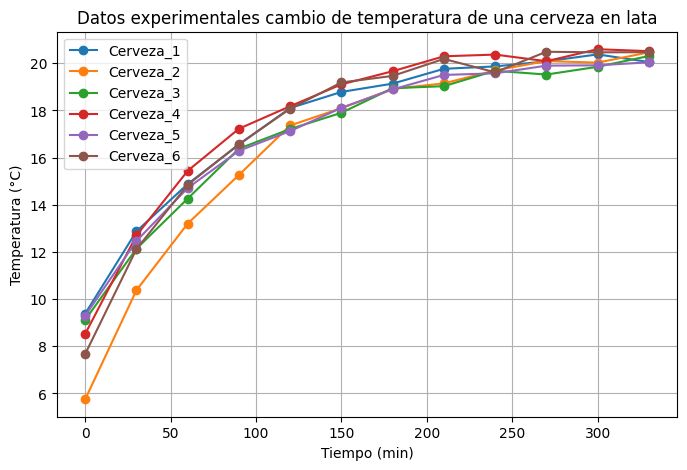

Step 0, Loss = 426241.656250
Step 200, Loss = 10.823634
Step 400, Loss = 0.216052
Step 600, Loss = 0.214332
Step 800, Loss = 0.212357
Step 1000, Loss = 0.210208
Step 1200, Loss = 0.207970
Step 1400, Loss = 0.205713
Step 1600, Loss = 0.203506
Step 1800, Loss = 0.201395


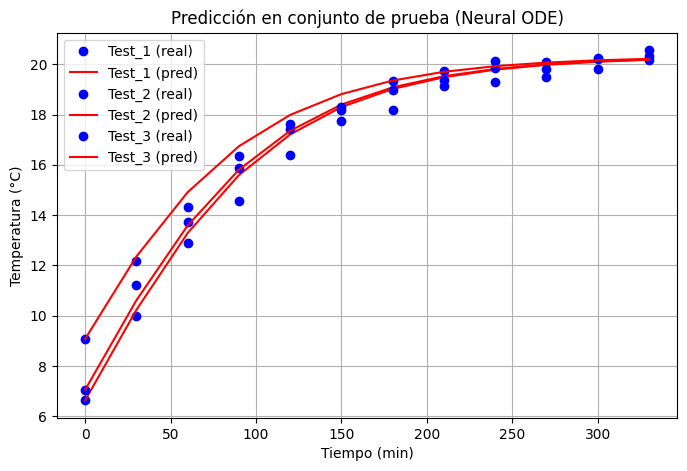

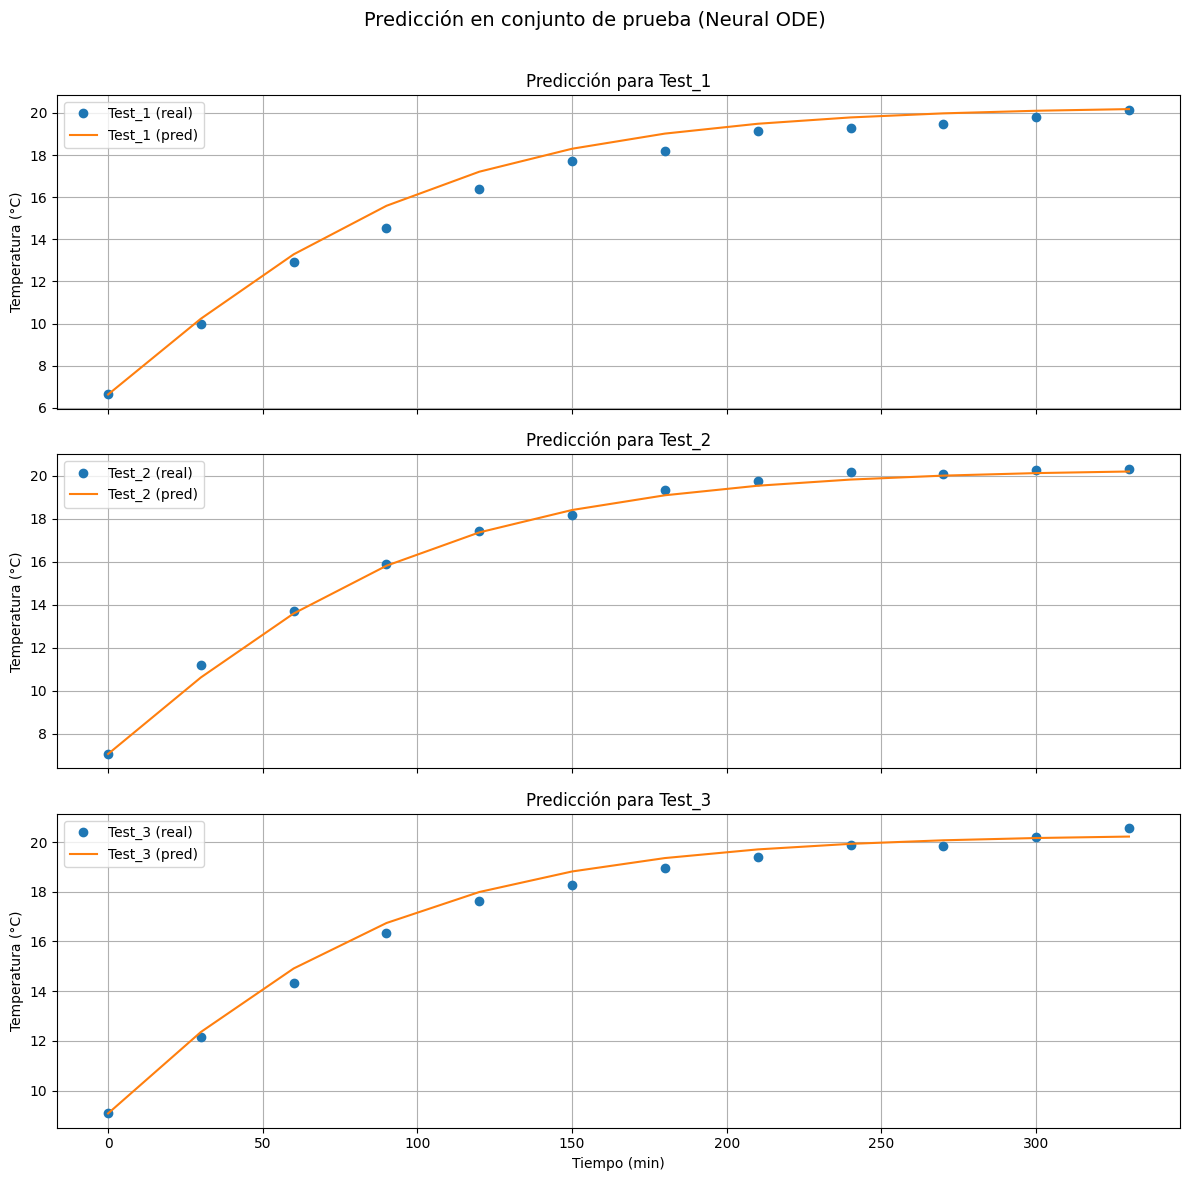

In [78]:
import time
import diffrax
import equinox as eqx
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax
import numpy as np
import pandas as pd

# -------------------------
# 1️⃣ Datos de entrenamiento
# -------------------------
def get_data_experimental():
    T_amb = 20.7
    T0 = 7.0
    k = 2e-4

    t_min = np.arange(0, 350, 30)
    t = t_min * 60

    def newton_cooling(t, T0, k, T_amb):
        return T_amb + (T0 - T_amb) * np.exp(-k * t)

    np.random.seed(42)
    data = []

    for i in range(1, 7):
        k_i = k * np.random.uniform(0.8, 1.2)
        T0_i = T0 + np.random.uniform(-2.5, 2.5)
        T_teorica = newton_cooling(t, T0_i, k_i, T_amb)
        ruido = np.random.normal(0, 0.2, size=len(t))
        T_obs = T_teorica + ruido

        df_i = pd.DataFrame({
            'cerveza': f'Cerveza_{i}',
            'tiempo_min': t_min,
            'temperatura': T_obs
        })
        data.append(df_i)

    df = pd.concat(data, ignore_index=True)
    # Visualización inicial
    plt.figure(figsize=(8, 5))
    for i in df['cerveza'].unique():
        sub = df[df['cerveza'] == i]
        plt.plot(sub['tiempo_min'], sub['temperatura'], 'o-', label=i)
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Datos experimentales cambio de temperatura de una cerveza en lata')
    plt.legend()
    plt.grid(True)
    plt.savefig("cervezas_prueba.png", dpi=300)
    plt.show()

    ts = jnp.array(t_min, dtype=jnp.float32)
    cervezas = df['cerveza'].unique()
    ys = jnp.stack([
        jnp.expand_dims(jnp.array(df[df['cerveza'] == c]['temperatura'].values, dtype=jnp.float32), axis=1)
        for c in cervezas
    ])
    return ts, ys


# -------------------------
# 2️⃣ Datos de prueba
# -------------------------
def get_data_test():
    T_amb = 20.7
    T0 = 7.0
    k = 2e-4

    t_min = np.arange(0, 350, 30)
    t = t_min * 60

    def newton_cooling(t, T0, k, T_amb):
        return T_amb + (T0 - T_amb) * np.exp(-k * t)

    np.random.seed(969)  # 🔸 Semilla diferente
    data = []

    for i in range(1, 4):  # 3 cervezas nuevas
        k_i = k * np.random.uniform(0.7, 1.1)
        T0_i = T0 + np.random.uniform(-1.9, 2.2)
        T_teorica = newton_cooling(t, T0_i, k_i, T_amb)
        ruido = np.random.normal(0, 0.15, size=len(t))  # un poco de ruido
        T_obs = T_teorica + ruido

        df_i = pd.DataFrame({
            'cerveza': f'Test_{i}',
            'tiempo_min': t_min,
            'temperatura': T_obs
        })
        data.append(df_i)

    df = pd.concat(data, ignore_index=True)

    ts = jnp.array(t_min, dtype=jnp.float32)
    cervezas = df['cerveza'].unique()
    ys = jnp.stack([
        jnp.expand_dims(jnp.array(df[df['cerveza'] == c]['temperatura'].values, dtype=jnp.float32), axis=1)
        for c in cervezas
    ])
    return ts, ys, df


# -------------------------
# 3️⃣ Modelo
# -------------------------
class Func(eqx.Module):
    mlp: eqx.nn.MLP
    def __init__(self, data_size, width_size, depth, *, key):
        self.mlp = eqx.nn.MLP(
            in_size=data_size,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            key=key,
        )

    def __call__(self, t, y, args):
        return self.mlp(y)


class NeuralODE(eqx.Module):
    func: Func
    def __init__(self, data_size, width_size, depth, *, key):
        self.func = Func(data_size, width_size, depth, key=key)

    def __call__(self, ts, y0):
        dt0 = (ts[1] - ts[0]).astype(jnp.float32)
        sol = diffrax.diffeqsolve(
            diffrax.ODETerm(self.func),
            diffrax.Tsit5(),
            t0=ts[0],
            t1=ts[-1],
            dt0=dt0,
            y0=y0,
            saveat=diffrax.SaveAt(ts=ts),
        )
        return sol.ys


# -------------------------
# 4️⃣ Entrenamiento + prueba
# -------------------------
def main(seed=42, width_size=16, depth=3, steps=2000, lr=3e-3):
    key = jr.PRNGKey(seed)
    ts, ys = get_data_experimental()
    y0 = ys[:, 0, :]
    data_size = ys.shape[-1]

    model = NeuralODE(data_size, width_size, depth, key=key)
    optim = optax.adabelief(lr)
    opt_state = optim.init(eqx.filter(model, eqx.is_inexact_array))

    @eqx.filter_value_and_grad
    def loss_fn(model):
        y_pred = jax.vmap(lambda y0_i: model(ts, y0_i))(y0)
        return jnp.mean((ys - y_pred) ** 2)

    @eqx.filter_jit
    def train_step(model, opt_state):
        loss, grads = loss_fn(model)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    for step in range(steps):
        loss, model, opt_state = train_step(model, opt_state)
        if step % 200 == 0:
            print(f"Step {step}, Loss = {loss:.6f}")

    # -------------------------
    # 🔹 Evaluación con datos de prueba
    # -------------------------
    ts_test, ys_test, df_test = get_data_test()
    y0_test = ys_test[:, 0, :]

    # Predicciones
    y_pred_test = jax.vmap(lambda y0_i: model(ts_test, y0_i))(y0_test)

    # -------------------------
    # 🔹 Visualización
    # -------------------------
    plt.figure(figsize=(8, 5))
    for i, c in enumerate(df_test['cerveza'].unique()):
        plt.plot(ts_test, ys_test[i, :, 0], 'o', color='b', label=f"{c} (real)")
        plt.plot(ts_test, y_pred_test[i, :, 0], '-', color='r', label=f"{c} (pred)")
    plt.xlabel("Tiempo (min)")
    plt.ylabel("Temperatura (°C)")
    plt.title("Predicción en conjunto de prueba (Neural ODE)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Crear figura con 3 subplots verticales
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    cervezas = df_test['cerveza'].unique()

    for i, c in enumerate(cervezas):
        ax = axes[i]
        ax.plot(ts_test, ys_test[i, :, 0], 'o', label=f"{c} (real)")
        ax.plot(ts_test, y_pred_test[i, :, 0], '-', label=f"{c} (pred)")
        ax.set_ylabel("Temperatura (°C)")
        ax.set_title(f"Predicción para {c}")
        ax.legend()
        ax.grid(True)

    axes[-1].set_xlabel("Tiempo (min)")
    fig.suptitle("Predicción en conjunto de prueba (Neural ODE)", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig("resultados.png", dpi=300)
    plt.show()

    return model


# Ejecutar
if __name__ == "__main__":
    model = main()
